<a href="https://colab.research.google.com/github/cindylozano/DataScienceTLG/blob/Redes/Nodos_importantes_Centralidad_Pr%C3%A1ctica_GOT_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nodos importantes: Centralidad

###¿Quiénes son los personajes más importantes de la temporada 1 de Game Of Thrones? 🐺🐲🦁🦌

#### Importación de librerías y generación de funciones

In [ ]:
# Importación de librerías
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
# Función para crear un grafo a partir de archivo csv
def read_net(url):
    g = nx.Graph()
    data = pd.read_csv(url)
    for _, row in data.iterrows():
        g.add_edge(row[0], row[1])
    return g

# Game of Thrones data
season = 1
g = read_net(f'https://raw.githubusercontent.com/cindylozano/DataScienceTLG/Redes/got-s{season}-edges.csv')

# Leer nodos con información adicional
houses = {}
nodes_url = f'https://raw.githubusercontent.com/cindylozano/DataScienceTLG/Redes/got-s{season}-nodes_ext.csv'
nodes_data = pd.read_csv(nodes_url)
for _, row in nodes_data.iterrows():
    node, house = row[0], row[2]
    g.add_node(node, house=house)

# node position for plotting
pos = nx.spring_layout(g)

In [ ]:
# Función para visualizar la red

# Support function to plot networks (only small graphs)
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(20, 20))
    nodes = nx.draw_networkx_nodes(
        G, pos, node_size=250, cmap=plt.cm.plasma,
        node_color=list(measures.values()),
        nodelist=measures.keys()
    )
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

#### Centralidad de grado
Cantidad de enlaces de un nodo con otro nodo de la red.

In [ ]:
degrees = dict(g.degree())

Esto nos crea un diccionario clave-valor con el nombre del nodo y su grado.
Ahora solo tenemos que ordenarlo de mayor a mostrar los 5 primeros
personajes:

In [ ]:
deg_cen = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
most_important = deg_cen[0:5]

In [ ]:
most_important

[('NED', 57), ('TYRION', 41), ('ROBERT', 36), ('CATELYN', 36), ('ROBB', 30)]

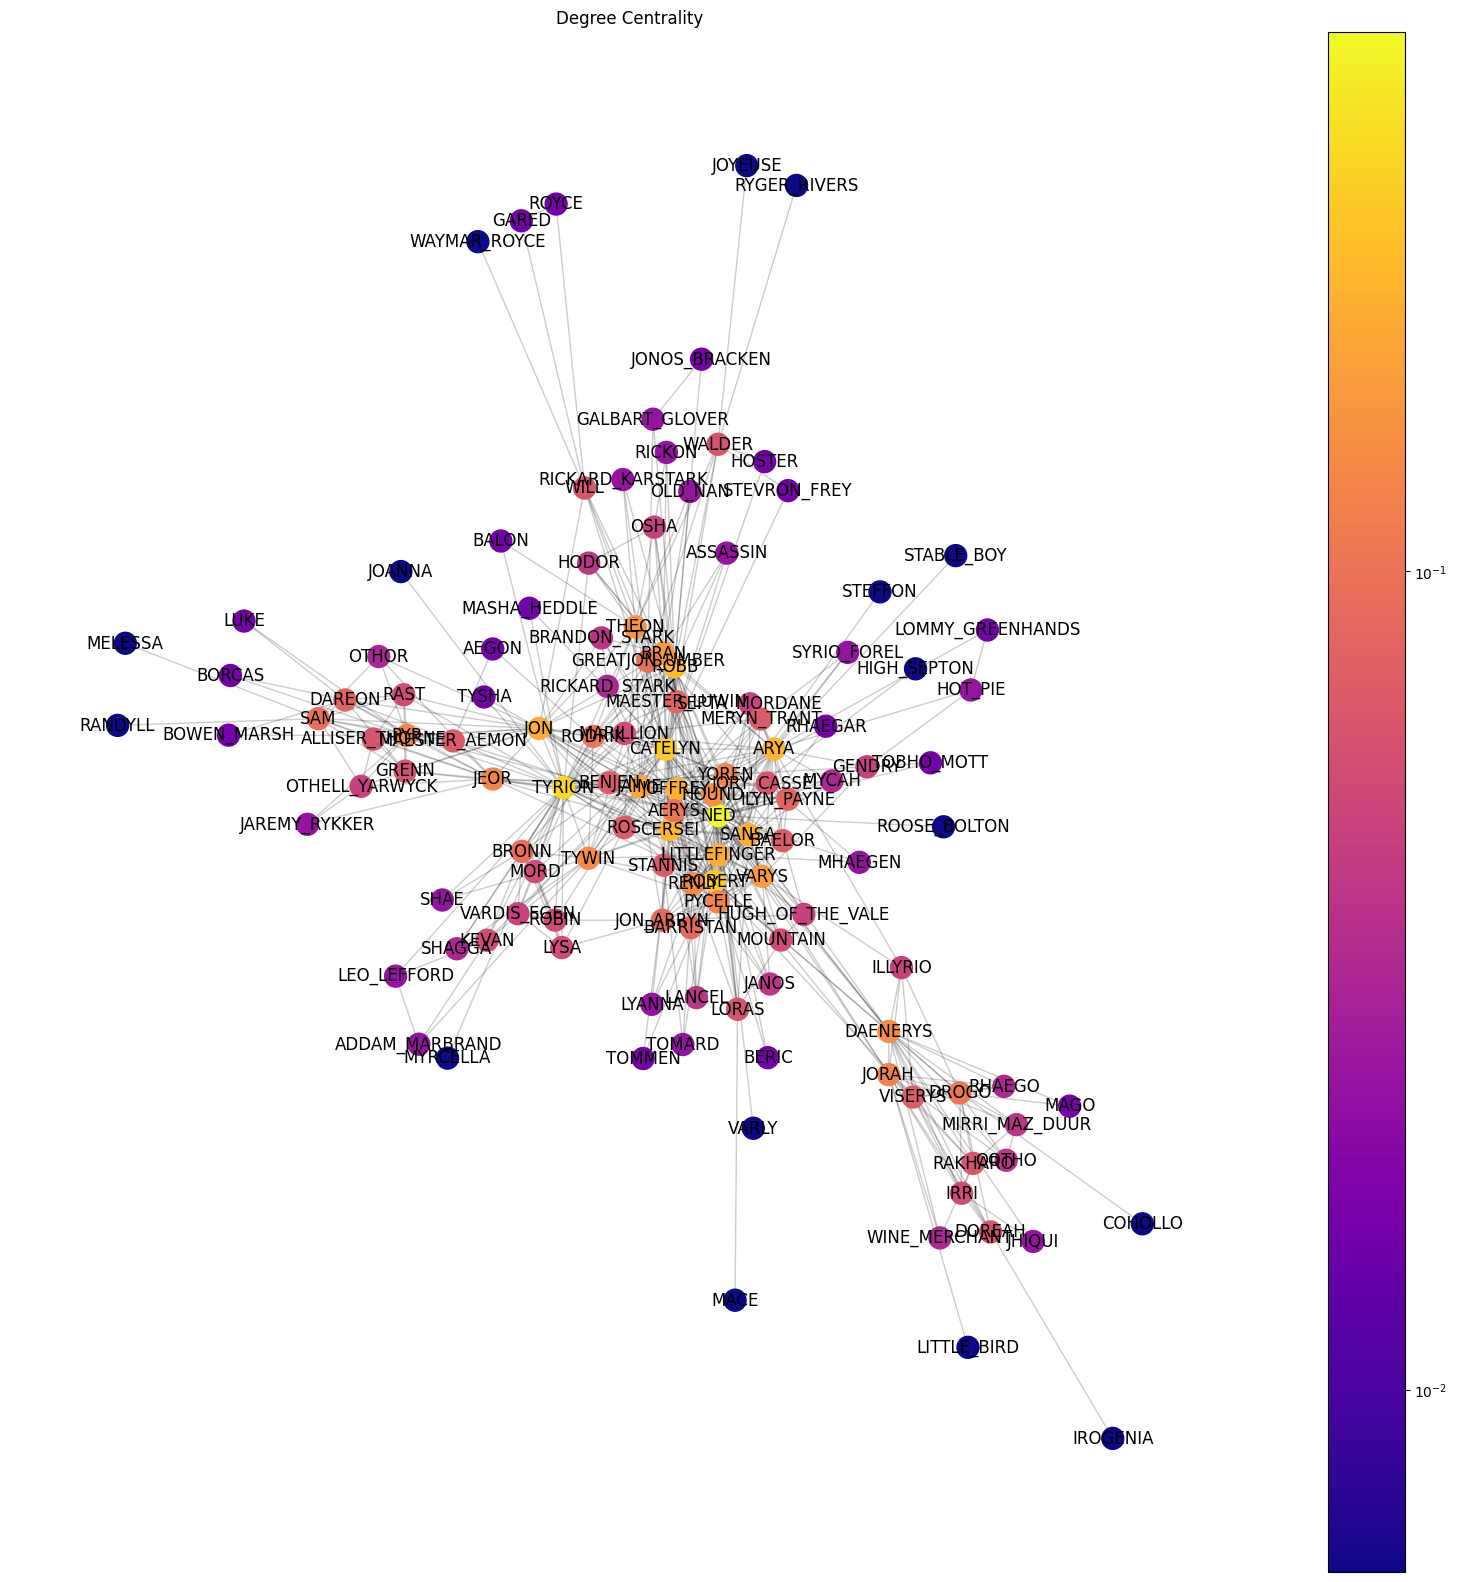

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = nx.degree_centrality(g)

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "Degree Centrality")

#### Centralidad de vector propio
Depende de la centralidad de sus vecinos.

In [ ]:
# Obtenemos los valores de centralidad de vector propio
eigen = nx.eigenvector_centrality(g)

In [ ]:
eigen_cen = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
most_important_eiges = eigen_cen[0:5]
most_important_eiges

[('NED', 0.3150820196903642),
 ('ROBERT', 0.24818996690338857),
 ('CERSEI', 0.23926199958075808),
 ('CATELYN', 0.23686569551759798),
 ('TYRION', 0.22976309137008433)]

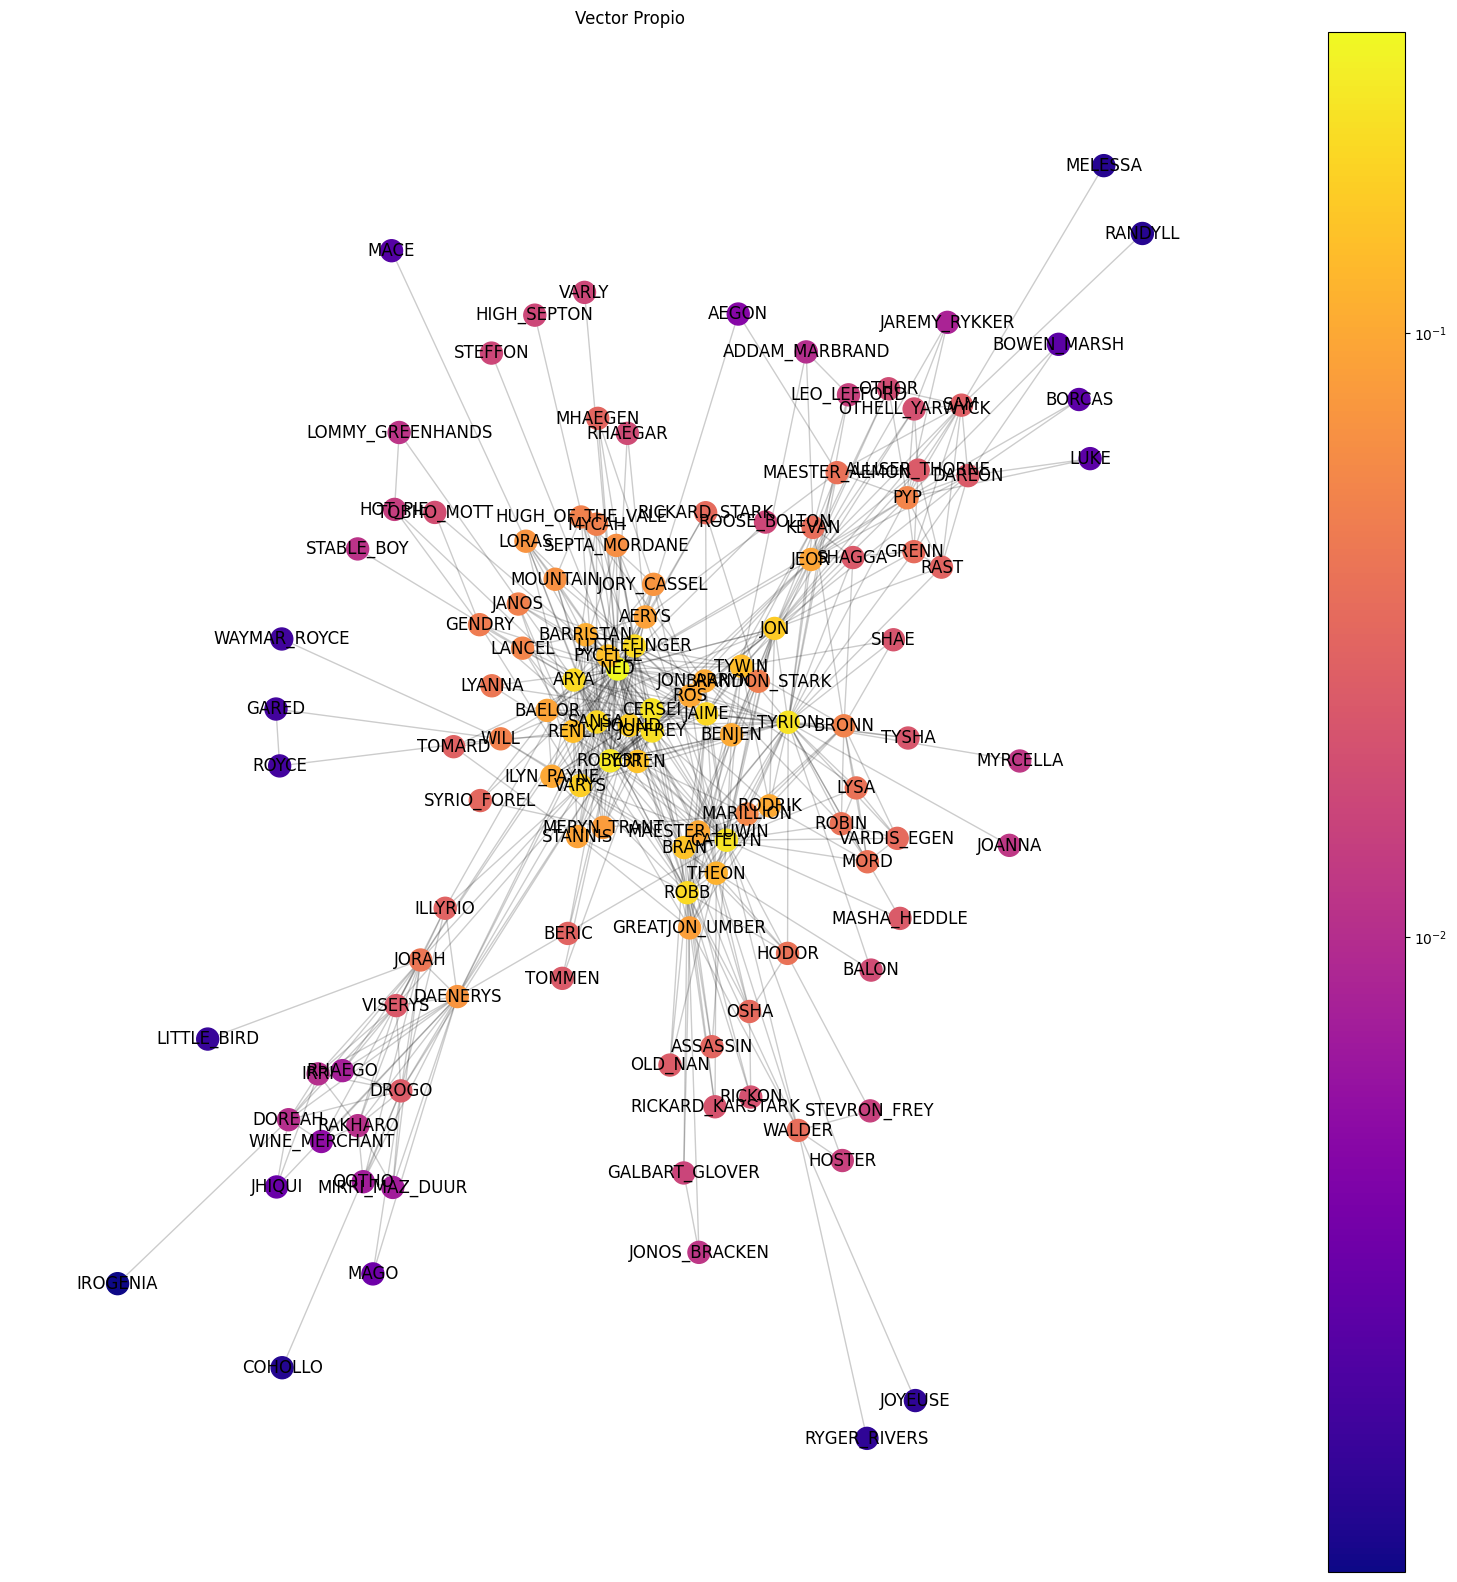

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = eigen

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "Vector Propio")

#### Centralidad de PageRank
Se base en el concepto de cruce de enlaces, el destino final más probable.

In [ ]:
# Obtenemos los valores de centralidad de pagerank
pagerank = nx.pagerank(g)

In [ ]:
pagerank_cen = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
most_important_pagerank = pagerank_cen[0:5]
most_important_pagerank

[('NED', 0.04732440668418977),
 ('TYRION', 0.03429723971129241),
 ('CATELYN', 0.028560851261564296),
 ('ROBERT', 0.027727076720068935),
 ('ROBB', 0.02426534864091988)]

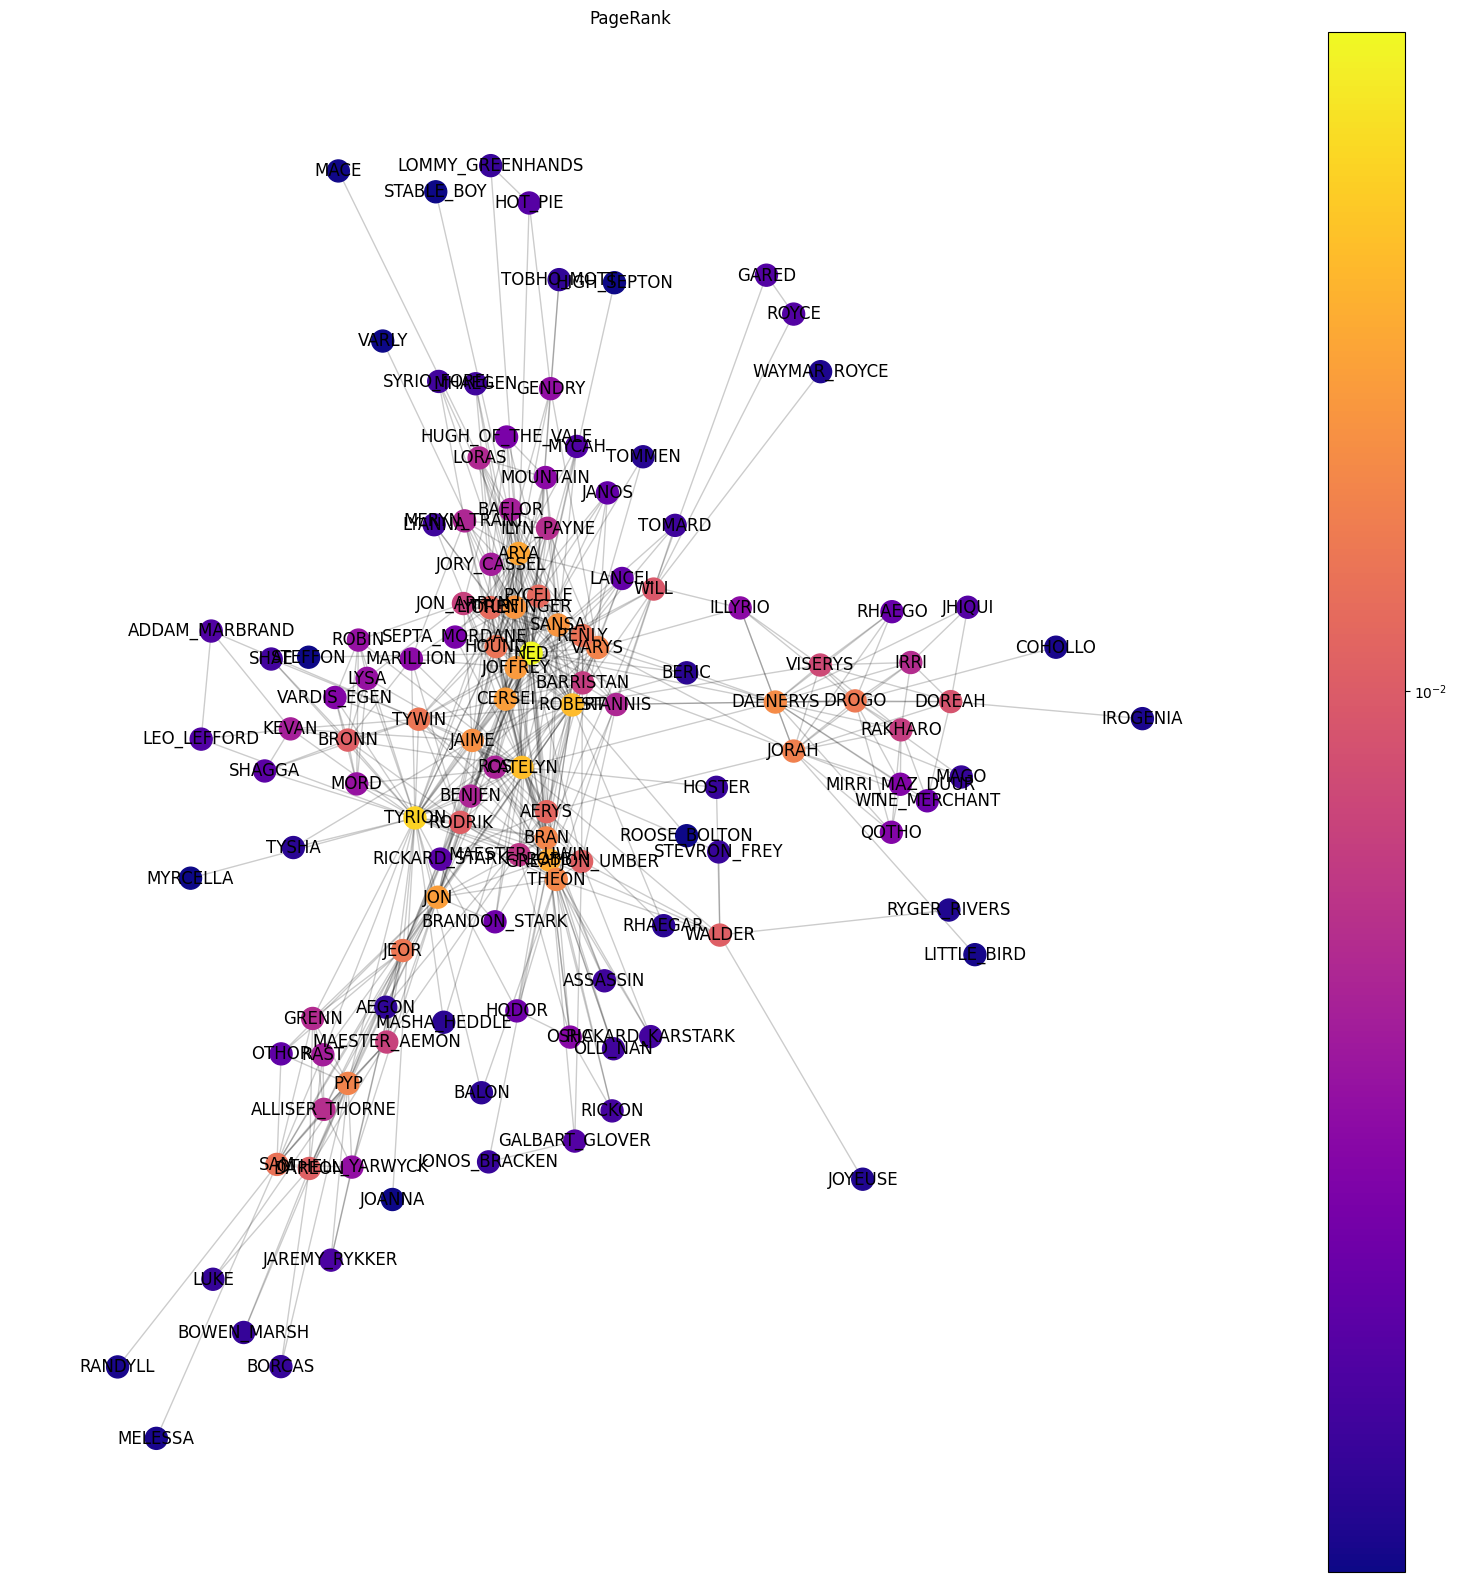

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = pagerank

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "PageRank")

#### Centralidad de intermediación
Número de caminos cortos que pasan por él.

In [ ]:
# Obtenemos los valores de centralidad de intermediación
betweenness = nx.betweenness_centrality(g)

In [ ]:
betweenness_cen = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
most_important_betweenness = betweenness_cen[0:5]
most_important_betweenness

[('NED', 0.3032802081478768),
 ('TYRION', 0.16302743524270866),
 ('CATELYN', 0.11828405295282027),
 ('ROBERT', 0.11039475684723862),
 ('DAENERYS', 0.10143128748178003)]

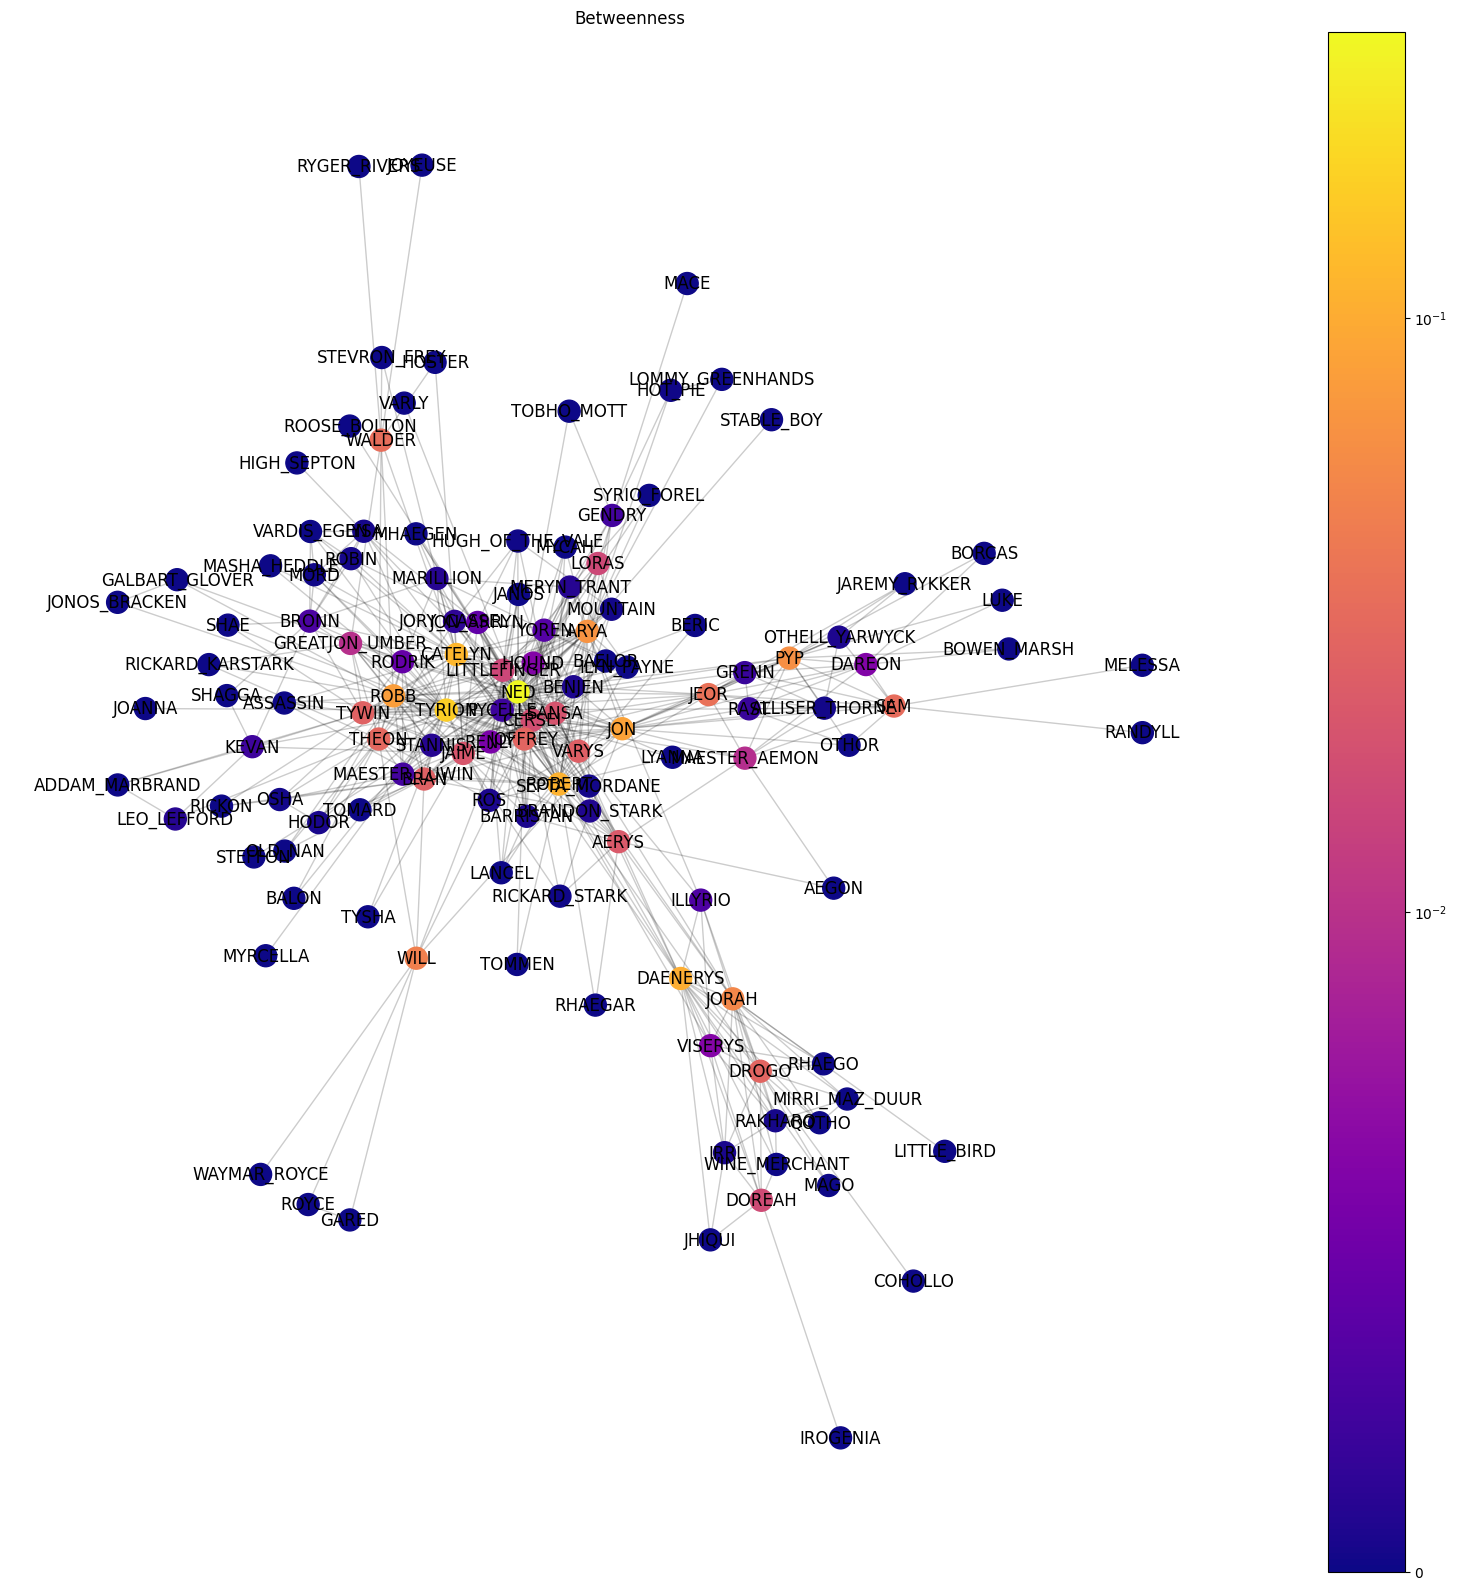

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = betweenness

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "Betweenness")

#### Centralidad de cercanía
Muy cerca del resto de nodos.

In [ ]:
# Obtenemos los valores de centralidad de cercanía
closeness = nx.closeness_centrality(g)

In [ ]:
closeness_cen = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
most_important_closeness = closeness_cen[0:5]
most_important_closeness

[('NED', 0.628140703517588),
 ('ROBERT', 0.5530973451327433),
 ('CATELYN', 0.5506607929515418),
 ('TYRION', 0.5434782608695652),
 ('JON', 0.5186721991701245)]

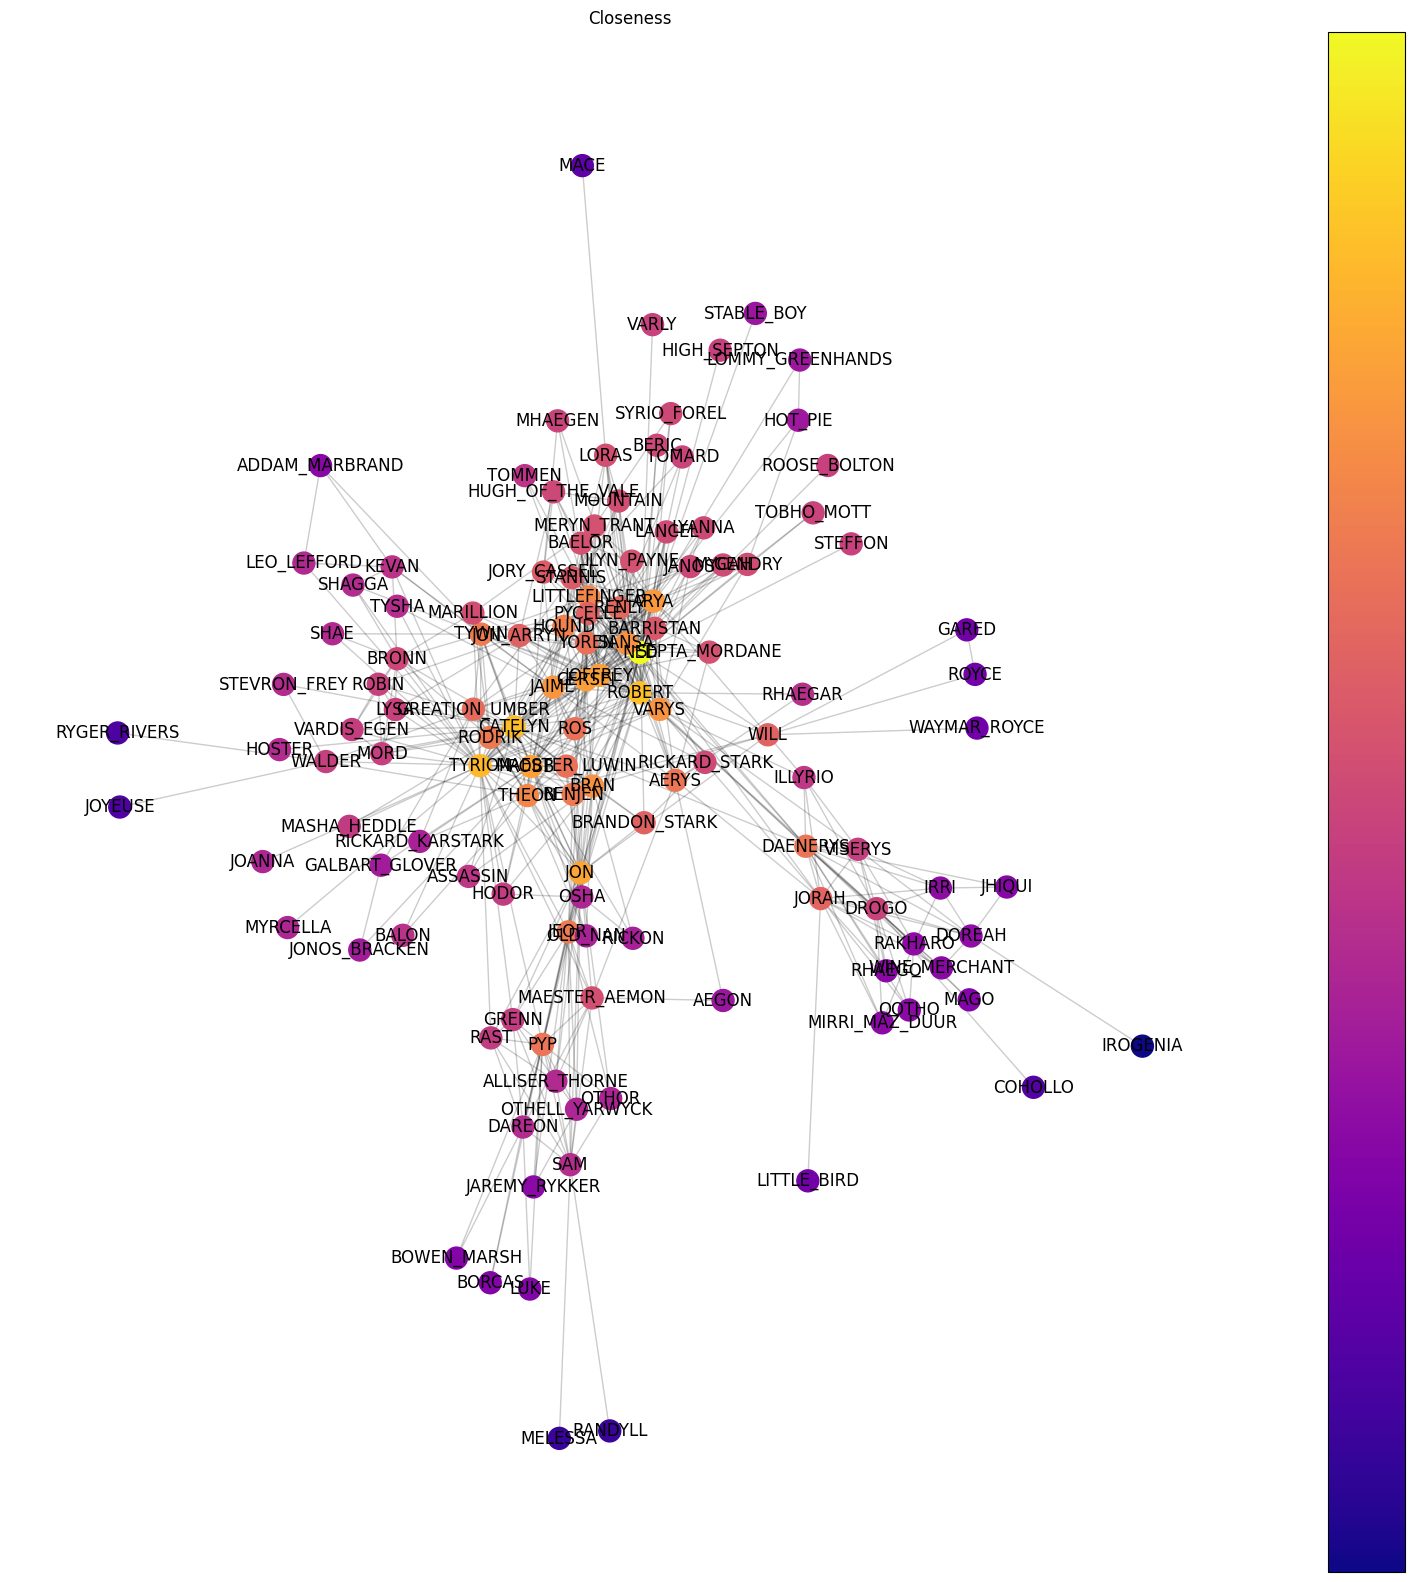

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = closeness

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "Closeness")

#### Centralidad armónica
La media armónica de las distancias más cortas de un nodo a los demás.

In [ ]:
# Obtenemos los valores de centralidad armónica
harmonic = nx.harmonic_centrality(g)

In [ ]:
harmonic_cen = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
most_important_harmonic = harmonic_cen[0:5]
most_important_harmonic

[('NED', 90.0),
 ('TYRION', 79.58333333333333),
 ('ROBERT', 78.5),
 ('CATELYN', 78.33333333333333),
 ('ROBB', 73.58333333333334)]

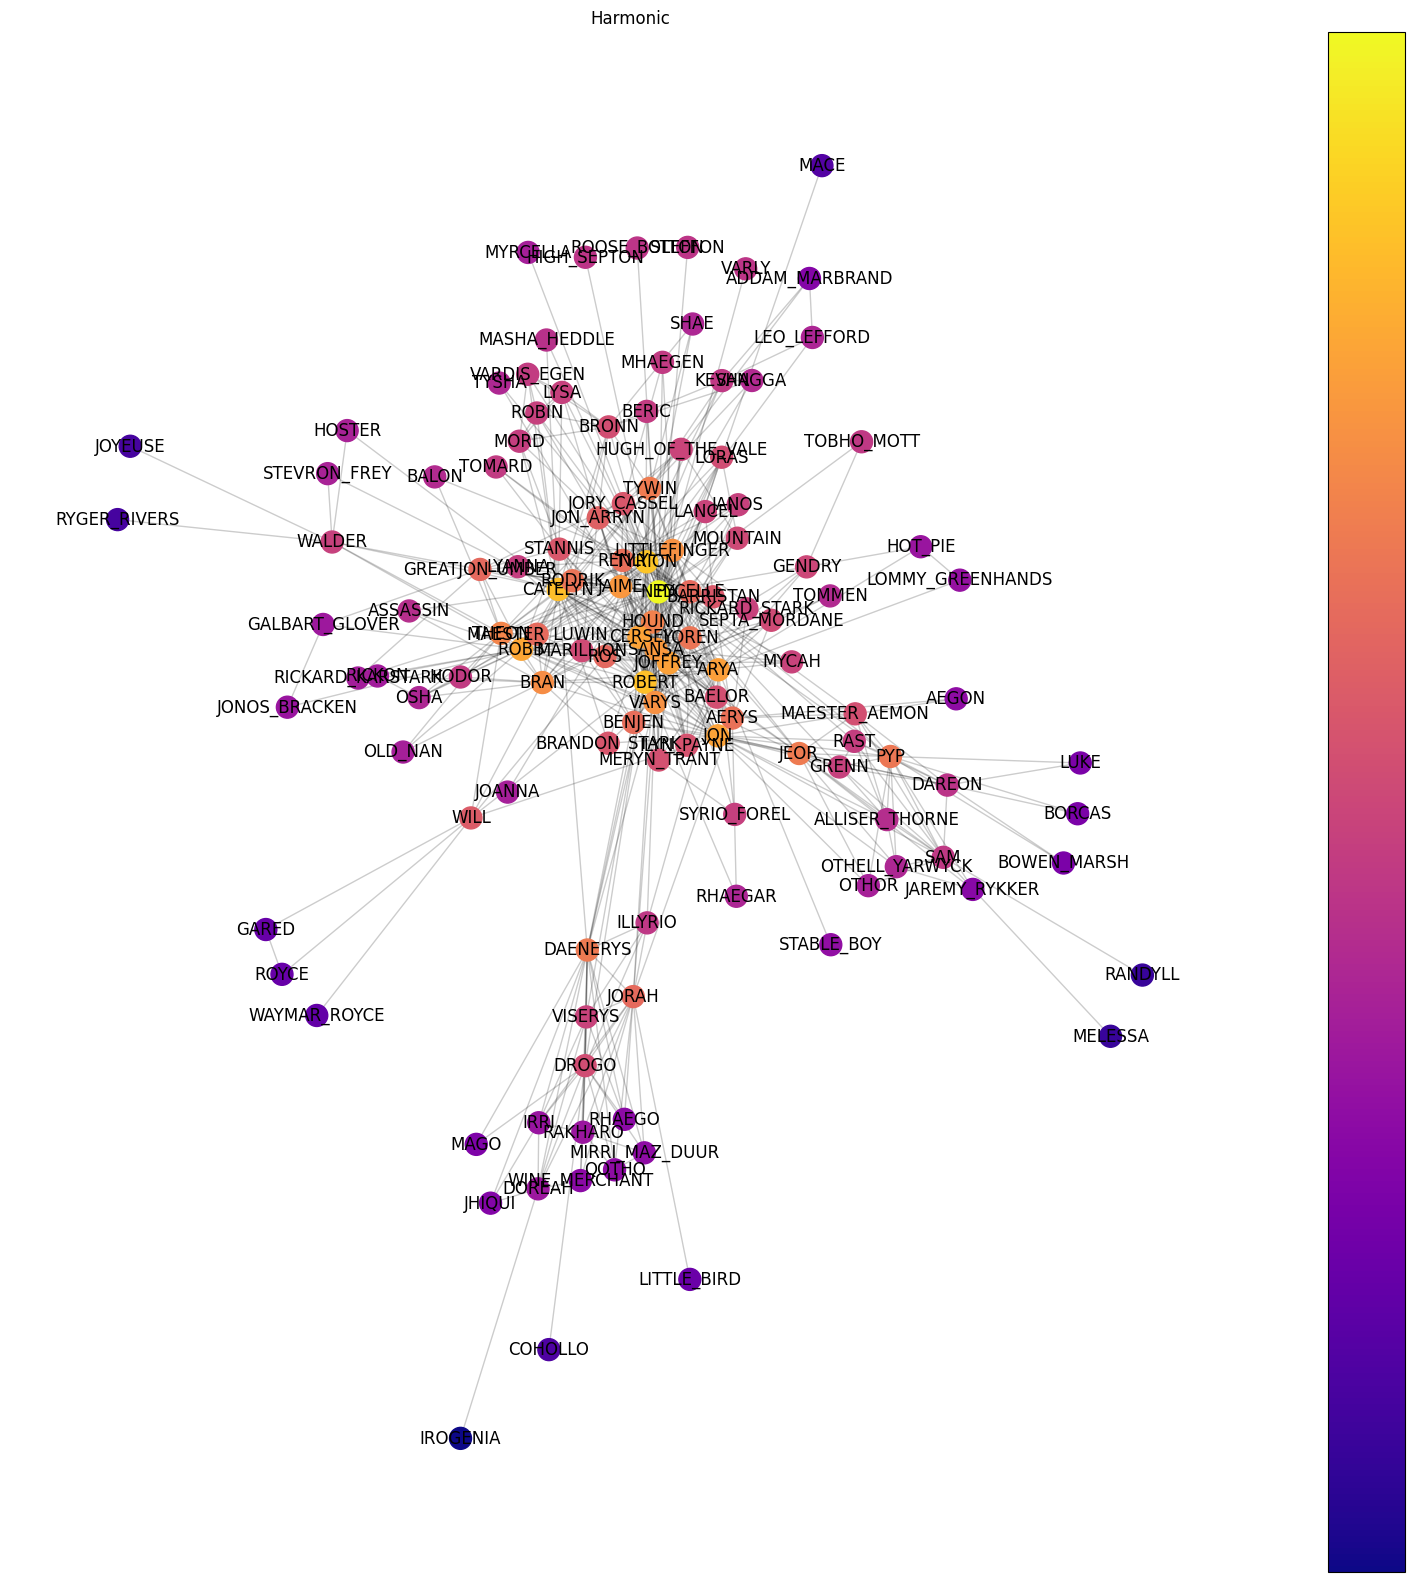

In [ ]:
# Posiciones de los nodos para la visualización
pos = nx.spring_layout(g)

# Calcular una medida de centralidad como ejemplo (puedes usar otra medida si deseas)
measures = harmonic

# Visualizar la red usando draw_net
draw_net(g, pos, measures, "Harmonic")